In [3]:
# load necessary libraries

import warnings
warnings.simplefilter("ignore")

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.tools.plotting import autocorrelation_plot

filename = 'international-airline-passengers.csv'

In [4]:
# ---------------------------------
# set plot attributes
# ---------------------------------
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 10
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = 10, 7

In [5]:
# ---------------------------------
# Load Dataset
# ---------------------------------
dataset = pd.read_csv(filename, 
                      header=0, parse_dates=[0],
                      index_col=0, squeeze=True)
# print dataset
print()
print(dataset.shape)
print(dataset.head(25))


(144,)
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
Name: Passenger, dtype: int64


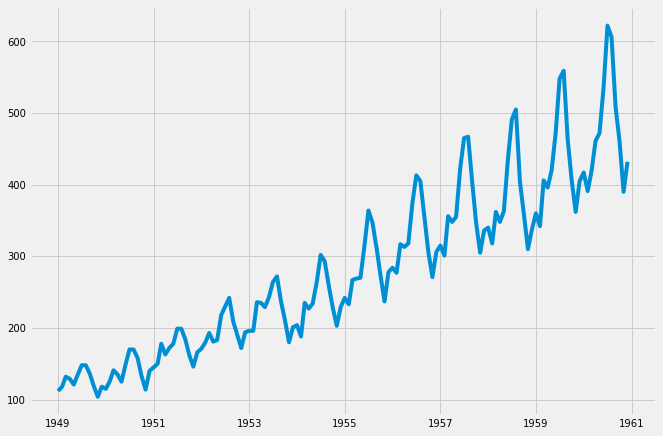

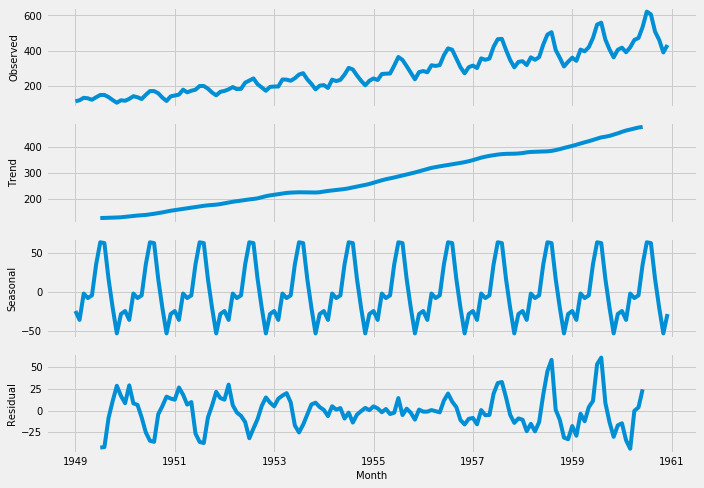

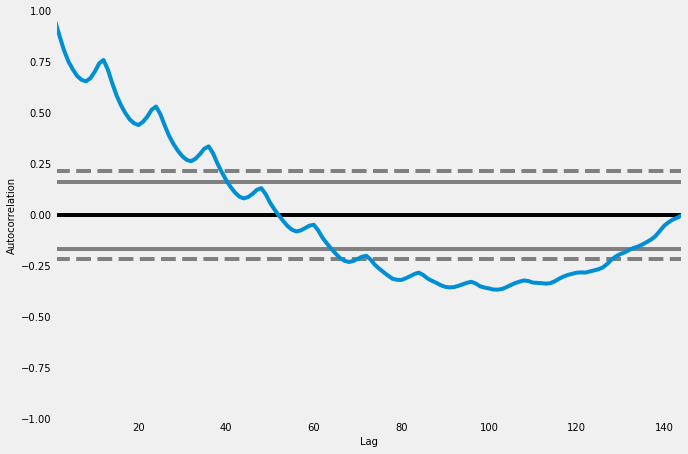

In [6]:
# ---------------------------------
# Visualise Time Series Dataset
# ---------------------------------
# Plot Dataset
plt.plot(dataset)
plt.show()

print('\n\n\n')

# Decompose diffentent Time Series elements e.g. trand, seasonality, Residual ... ...
decomposition = sm.tsa.seasonal_decompose(dataset, model='additive')
decomposition.plot()
plt.show()

print('\n\n\n')

# Auto-correlation plot
autocorrelation_plot(dataset)
plt.show()

In [7]:
# -------------------------------------------------
# SARIMAX - Seasonal Random Walk Model 
# -------------------------------------------------
warnings.simplefilter("ignore")

model = SARIMAX(dataset, order=(0, 1, 0), seasonal_order=(0, 1, 0, 12))
results = model.fit(disp=False)

                                 Statespace Model Results                                 
Dep. Variable:                          Passenger   No. Observations:                  144
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -514.754
Date:                            Thu, 27 Dec 2018   AIC                           1031.508
Time:                                    08:32:06   BIC                           1034.383
Sample:                                01-01-1949   HQIC                          1032.676
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       151.5582     12.906     11.743      0.000     126.262     176.854
Ljung-Box (Q):                     

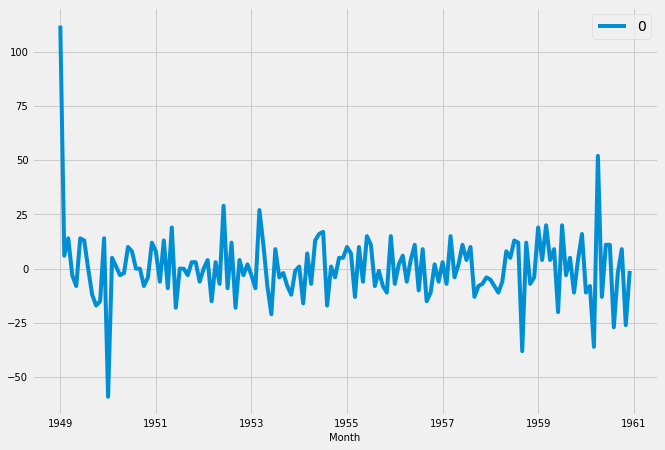

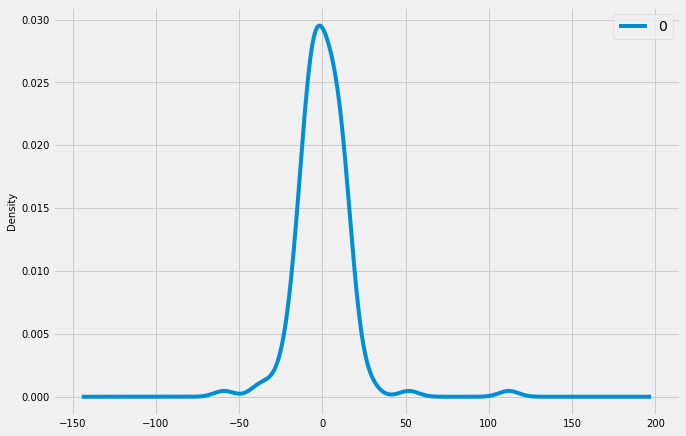

                0
count  144.000000
mean     0.576359
std     16.162563
min    -59.004243
25%     -8.000000
50%      0.000000
75%      9.000000
max    112.000000


In [8]:
# Get summary of the model
print(results.summary())
print(results.summary().tables[1])
print(results.summary().tables[2])

# plot residual errors
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
    
print(residuals.describe())

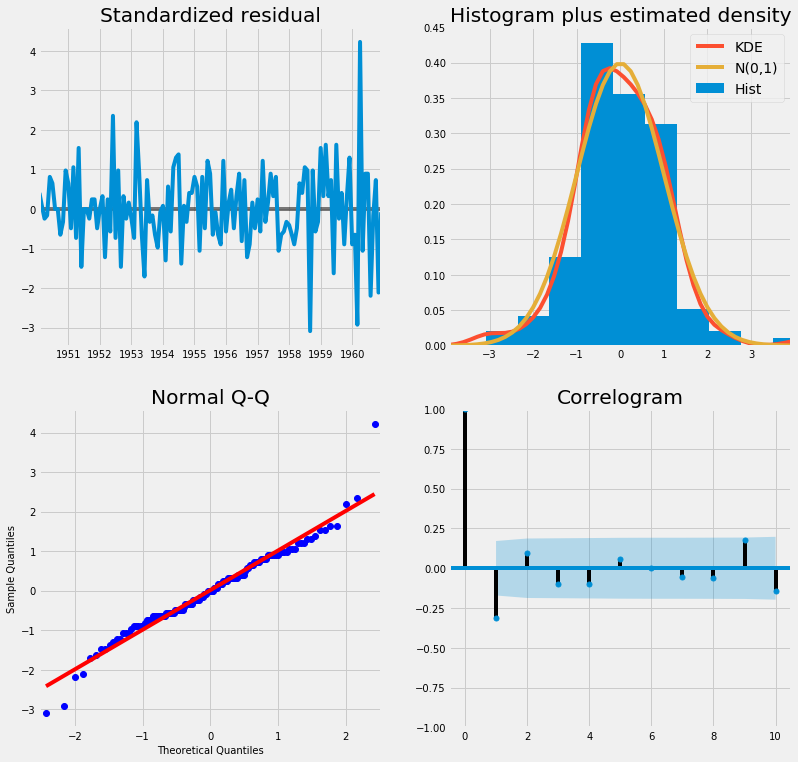

In [9]:
# -------------------------------------------------------------
# Visualise model's behaviourusing built-in diagnostics
# ------------------------------------------------------------- 
results.plot_diagnostics(figsize=(12, 12))
plt.show()

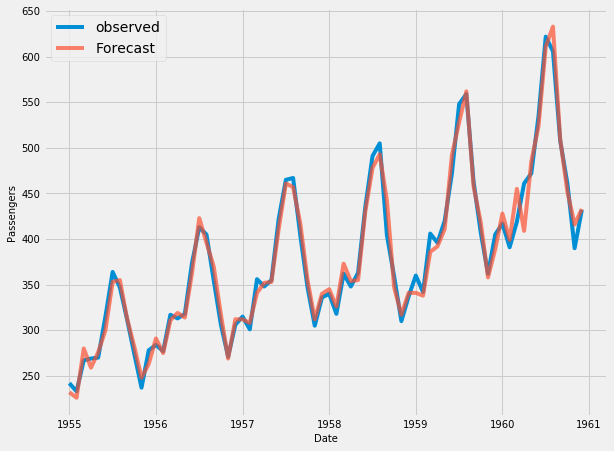

In [10]:
# ------------------------------------------------
# Validating forecasts from the fitted model
# ------------------------------------------------
pred    = results.predict(start=pd.to_datetime('1955-01'))
actual  = dataset['1955-01':].plot(label='observed')
    
pred.plot(ax=actual, label='Forecast', alpha=.7, figsize=(9, 7))

actual.set_xlabel('Date')
actual.set_ylabel('Passengers')
plt.legend()
plt.show()

In [11]:
# -------------------------------------------------------
# Evaluating the model using different KPIs or metrics
# -------------------------------------------------------
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
y_forecasted    = results.predict(start=pd.to_datetime('1955-01'))
y_truth         = dataset['1955-01':]

coefficient_of_dermination = r2_score(y_truth, y_forecasted)
print("R squared: ", coefficient_of_dermination)

mae = mean_absolute_error(y_truth, y_forecasted)
print('The Mean Absolute Error of our forecasts is {}'.format(round(mae, 2)))

mse = mean_squared_error(y_truth, y_forecasted)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

msle = mean_squared_log_error(y_truth, y_forecasted)
print('The Mean Squared Log Error of our forecasts is {}'.format(round(msle, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

R squared:  0.974682054301859
The Mean Absolute Error of our forecasts is 10.6
The Mean Squared Error of our forecasts is 186.54
The Mean Squared Log Error of our forecasts is 0.0
The Root Mean Squared Error of our forecasts is 13.66


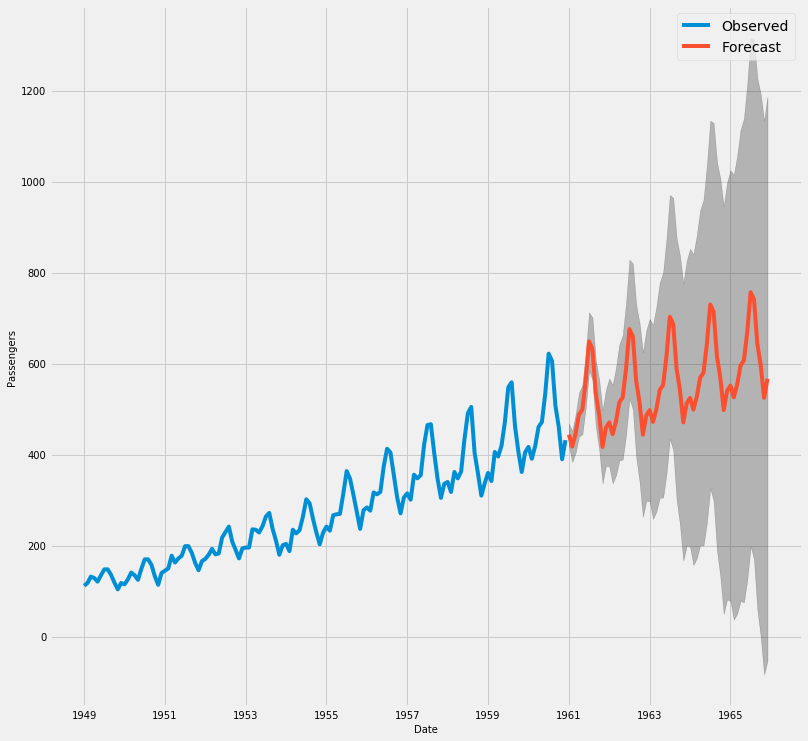

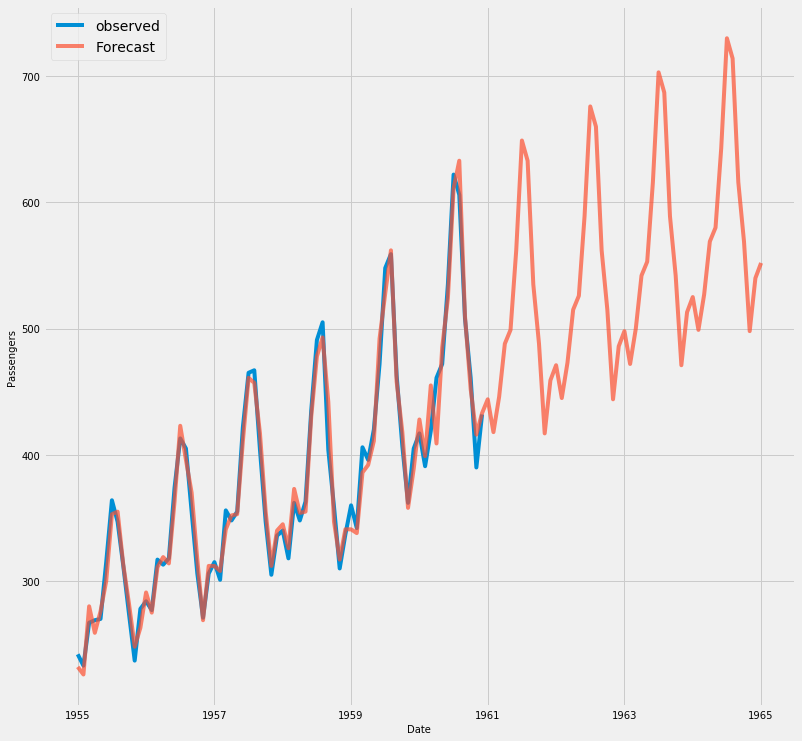

In [14]:
# -----------------------------------------------
# Forecasts (Prediction) and Visualisation
# -----------------------------------------------
pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = dataset.plot(label='Observed', figsize=(12, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

print('\n\n\n')

# -------------------------------
# More on Plots ... ... ...
# -------------------------------

pred    = results.predict(start=pd.to_datetime('1955-01'), 
                              end=pd.to_datetime('1965-01'),
                              dynamic=False)
actual  = dataset['1955-01':].plot(label='observed')
    
pred.plot(ax=actual, label='Forecast', alpha=.7, figsize=(12, 12))

actual.set_xlabel('Date')
actual.set_ylabel('Passengers')
plt.legend()
plt.show()